# Code for Section 2.2 Risk Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Download and preprocess data

In [2]:
tickers = [
    'XLB', 'XLE', 'XLF', 'XLI', 'XLK',
    'XLP', 'XLU', 'XLV', 'XLY', '^GSPC']
data = yf.download(tickers, start='1998-12-22', end='2024-10-12')['Adj Close']

names_dict = {
    'XLB': 'Materials', 'XLE': 'Energy', 'XLF': 'Financial', 'XLI': 'Industrial',
    'XLK': 'Technology', 'XLP': 'Consumer Staples', 'XLU': 'Utilities',
    'XLV': 'Health Care', 'XLY': 'Consumer Discretionary', '^GSPC': 'S&P 500'}
data = data.rename(columns=names_dict)

print(f'The number of daily observations is {len(data)}.')

[*********************100%%**********************]  10 of 10 completed

The number of daily observations is 6493.


# Compute and plot return series

In [3]:
H = 1
equity_returns = (data.values[H:] - data.values[0:-H]) / data.iloc[0:-H]
equity_returns_df = pd.DataFrame(100 * equity_returns, columns=data.columns)

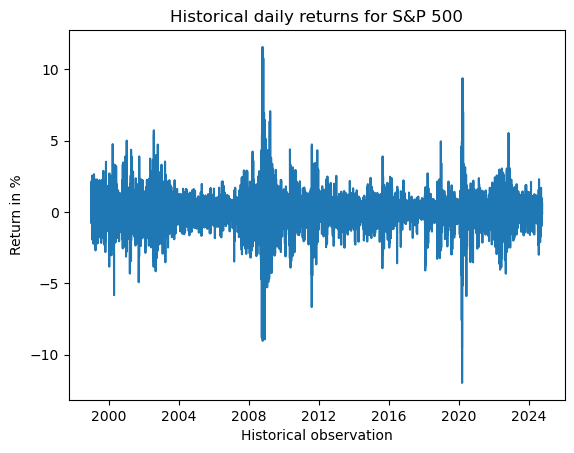

In [4]:
index = 9  # can be freely specified to something else
index_name = equity_returns_df.columns[index]
plt.plot(equity_returns_df.index, equity_returns_df[index_name].values)
plt.ylabel('Return in %')
plt.xlabel('Historical observation')
plt.title(f'Historical daily returns for {index_name}')
plt.show()

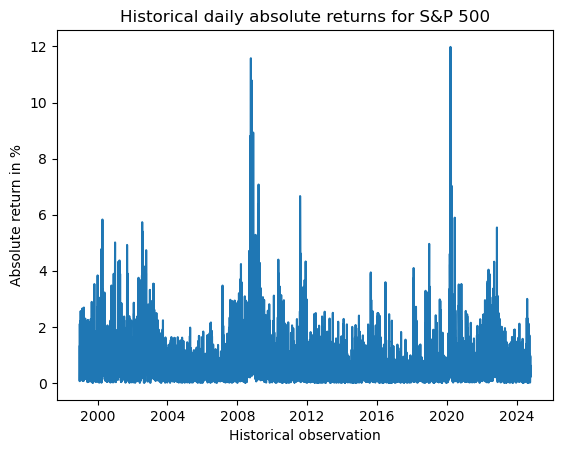

In [5]:
plt.plot(equity_returns_df.index, np.abs(equity_returns_df[index_name].values))
plt.ylabel('Absolute return in %')
plt.xlabel('Historical observation')
plt.title(f'Historical daily absolute returns for {index_name}')
plt.show()

# Lagged regression plots

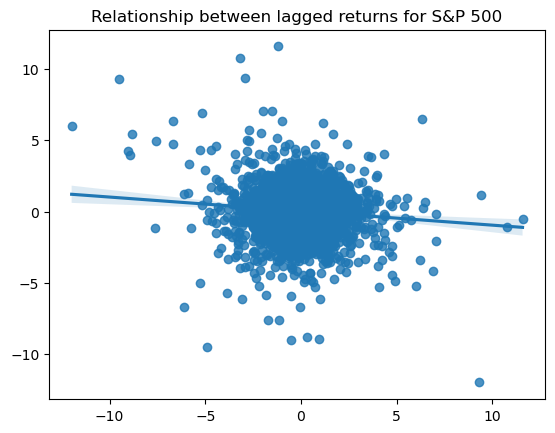

In [6]:
sns.regplot(
    x=equity_returns_df[index_name].values[0:-1], y=equity_returns_df[index_name].values[1:])
plt.title(f'Relationship between lagged returns for {index_name}')
plt.show()

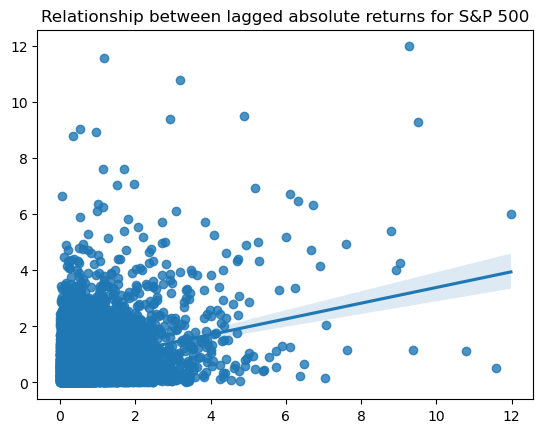

In [7]:
sns.regplot(
    x=np.abs(equity_returns_df[index_name].values[0:-1]), y=np.abs(equity_returns_df[index_name].values[1:]))
plt.title(f'Relationship between lagged absolute returns for {index_name}')
plt.show()